In [1]:
import sys
sys.path.append('/home/wangs/rs/lib')
import ff
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm import tqdm
import statsmodels.api as sm
from datetime import datetime
import mplfinance as mpf
from functools import partial
import matplotlib as mpl

ILLQ 每个月股票的非流动性ILLIQ是其本月每日股票收益绝对值与成交额的比值的均值，再取自然对数
衡量了股票收益对每单位交易额的敏感程度

In [77]:
ret = np.abs(ff.rets_all.loc[:,'20200102':])
Vol = (ff.read('amount')/1000000).loc[:,'20200102':]
ratio = ret/Vol

In [78]:
ILLIQ = np.log(1+ratio.rolling(window = 20, closed = 'left',axis = 1).mean())

In [90]:
IQ_small = ((ILLIQ > ILLIQ.quantile(0.9)) * ILLIQ).iloc[:-1,:]
IQ_high = ((ILLIQ < ILLIQ.quantile(0.1)) * ILLIQ).iloc[:-1,:]

In [87]:
import extend
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set_style("whitegrid")
sns.set_palette("Pastel1")
mpl.rc("font",family='Droid Sans Fallback',weight="bold")
mv = ff.read('total_mv').loc[IQ_small.index,IQ_small.columns]
factor_neu = extend.spread_reg(IQ_small, mv, ind=True)

long normal
持仓模式： 普通模式
持仓周期： 1
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出


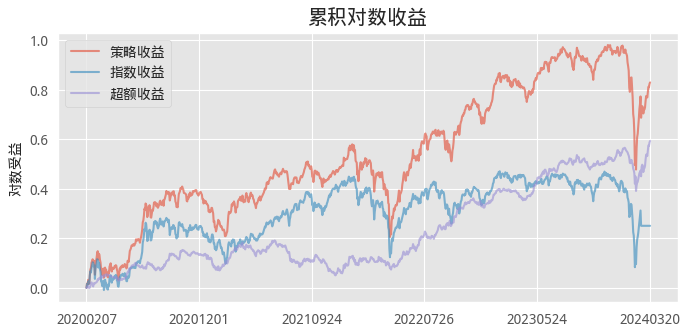

,指数收益,超额收益,策略收益
年化收益率,0.062,0.148,0.207
年化波动率,0.210,0.109,0.251
夏普率,0.297,1.359,0.823
最大回撤,-0.387,-0.174,-0.502
收益回撤比,0.161,0.848,0.412
胜率,0.522,0.526,0.543
盈亏比,0.963,1.142,0.977


(        指数收益   超额收益   策略收益
 年化收益率  0.062  0.148  0.207
 年化波动率  0.210  0.109  0.251
 夏普率    0.297  1.359  0.823
 最大回撤  -0.387 -0.174 -0.502
 收益回撤比  0.161  0.848  0.412
 胜率     0.522  0.526  0.543
 盈亏比    0.963  1.142  0.977,
                 策略     index          策略收益      指数收益      超额收益
 20200207  1.000000  1.000000  6.661338e-16  0.000000  0.000000
 20200210  1.016993  1.015485  1.685043e-02  0.015366  0.001507
 20200211  1.015475  1.009975  1.535679e-02  0.009925  0.005433
 20200212  1.032603  1.026166  3.208302e-02  0.025829  0.006268
 20200213  1.016698  1.016279  1.655993e-02  0.016148  0.000483
 ...            ...       ...           ...       ...       ...
 20240315  2.201441  1.284230  7.891120e-01  0.250159  0.552833
 20240318  2.250022  1.284230  8.109401e-01  0.250159  0.574661
 20240319  2.245864  1.284230  8.090905e-01  0.250159  0.572811
 20240320  2.277484  1.284230  8.230715e-01  0.250159  0.586792
 20240321  2.290427  1.284230  8.287383e-01  0.250159  0.592459
 
 [100

In [88]:
ff.run(factor_neu*ff.filter0, positions = 100, period = 1, fees = 0) 

long normal
持仓模式： 普通模式
持仓周期： 1
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出


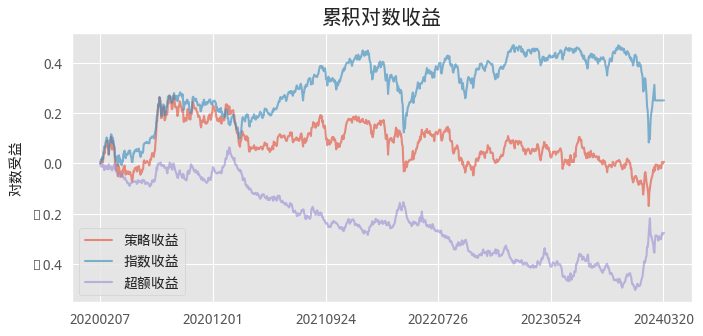

,指数收益,超额收益,策略收益
年化收益率,0.062,-0.069,0.002
年化波动率,0.210,0.134,0.215
夏普率,0.297,-0.512,0.008
最大回撤,-0.387,-0.567,-0.439
收益回撤比,0.161,-0.121,0.004
胜率,0.522,0.445,0.511
盈亏比,0.963,1.141,0.956


(        指数收益   超额收益   策略收益
 年化收益率  0.062 -0.069  0.002
 年化波动率  0.210  0.134  0.215
 夏普率    0.297 -0.512  0.008
 最大回撤  -0.387 -0.567 -0.439
 收益回撤比  0.161 -0.121  0.004
 胜率     0.522  0.445  0.511
 盈亏比    0.963  1.141  0.956,
                 策略     index          策略收益      指数收益      超额收益
 20200207  1.000000  1.000000  6.661338e-16  0.000000  0.000000
 20200210  1.003243  1.015485  3.237798e-03  0.015366 -0.012317
 20200211  1.008284  1.009975  8.250363e-03  0.009925 -0.001920
 20200212  1.018818  1.026166  1.864319e-02  0.025829 -0.007520
 20200213  1.002531  1.016279  2.527437e-03  0.016148 -0.013893
 ...            ...       ...           ...       ...       ...
 20240315  0.998196  1.284230 -1.805746e-03  0.250159 -0.283756
 20240318  1.006224  1.284230  6.204710e-03  0.250159 -0.275745
 20240319  0.999145  1.284230 -8.556328e-04  0.250159 -0.282806
 20240320  1.002611  1.284230  2.607187e-03  0.250159 -0.279343
 20240321  1.006534  1.284230  6.513055e-03  0.250159 -0.275437
 
 [100

In [107]:
mv = ff.read('total_mv').loc[IQ_high.index,IQ_high.columns]
factor_neu = extend.spread_reg(IQ_high, mv, ind=True)
ff.run(factor_neu*ff.filter0, positions = 100, period = 1, fees = 0) 

多空组合的收益几乎为0.空头段对收益的贡献较少

基于弹性网络模型的方法来预测未来的非流动性

Lasso 和 岭回归的结合，惩罚项是对L1和L2范数的一个权衡

In [165]:
ret = np.abs(ff.rets_all)
Vol = (ff.read('amount')/1000000)
ratio = ret/Vol

In [202]:
ILLIQt = np.log(1+ratio.rolling(window = 20, closed = 'left',axis = 1).mean()).loc[:,'20170103':'20231229']
ILLIQ3t = np.log(1+ratio.rolling(window = 60, closed = 'left',axis = 1).mean()).loc[:,'20170103':'20231229']
ILLIQ12t = np.log(1+ratio.rolling(window = 240, closed = 'left',axis = 1).mean()).loc[:,'20170103':'20231229']
ILLIQt_v = np.log(1+ratio.rolling(window = 20, closed = 'left',axis = 1).std()).loc[:,'20170103':'20231229']
ILLIQ12t_v = np.log(1+ratio.rolling(window = 20, closed = 'left',axis = 1).std()).loc[:,'20170103':'20231229']

In [372]:
amount = ff.read('amount').rolling(window = 20,closed = 'left',axis = 1).mean().loc[:,'20170103':'20231229']/10000000

In [373]:
total_mv = (ff.read('total_mv')/10000000).loc[:,'20170103':'20231229']

In [206]:
turnover = ff.read('turnover_rate').rolling(window = 20,closed = 'left',axis = 1).mean().loc[:,'20170103':'20231229']

In [207]:
pb = ff.read('pb').loc[:,'20180102':'20231229']

In [208]:
short_mom =  (ff.read('close') - ff.read('close').shift(20,axis=1)).loc[:,'20170103':'20231229']

In [210]:
long_mom = (ff.read('close') - ff.read('close').shift(240,axis =1)).loc[:,'20170103':'20231229']

In [401]:
X = pd.concat([ILLIQt.loc['000001.SZ'],ILLIQ3t.loc['000001.SZ'],ILLIQ12t.loc['000001.SZ'],ILLIQt_v.loc['000001.SZ'],ILLIQ12t_v.loc['000001.SZ'],turnover.loc['000001.SZ'],amount.loc['000001.SZ'],total_mv.loc['000001.SZ'],pb.loc['000001.SZ'],short_mom.loc['000001.SZ'],long_mom.loc['000001.SZ']],axis = 1)
X.columns  = ['ILLIQ','ILLIQ3t','ILLIQ12t','ILLIQt_v','ILLIQ12t_v','turnover','amount','total_mv','pb','short_mom','long_mom']
X = sm.add_constant(X)
X = X[:-1].replace({np.nan:0}).values

In [402]:
Y = ILLIQt.loc['000001.SZ'].shift(-1)
Y = Y[:-1]
Y = pd.DataFrame(Y).replace({np.nan:0}).values

In [412]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state =1)
reg = ElasticNet(alpha=0.01, l1_ratio=0.5, fit_intercept=False)
reg.fit(X_train,y_train)  #使用训练数据进行参数求解
y_hat2 = reg.predict(X_test)  #对测试集的预测
print ("MSE:",metrics.mean_squared_error(y_test, y_hat2))  #计算RMSE

MSE: 2.5507727698412472e-05


In [404]:
reg.coef_

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.])